In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

ModuleNotFoundError: No module named 'gensim'

In [1]:
# Take only comment and point columns in dataset
df = pd.read_csv('data/turkish_movie_sentiment_dataset.csv')
del df['film_name']
df.head(10)

NameError: name 'pd' is not defined

In [4]:
# Clean dataset:
#   remove all punctions, numbers, newlines etc.
#   make points categorical(5 class): 0-1->0 , 2->1, 3->2, 4->3, 5->4 
df['comment'] = df['comment'].replace('\s+', ' ', regex=True)
df['comment'] = df['comment'].replace('http\S+', '', regex=True)
df['comment'] = df['comment'].replace('[^a-zA-ZığĞÜüŞşİÖöÇç]', ' ', regex=True)
df['point'] = df['point'].replace('0,5','0', regex=True)
df['point'] = df['point'].replace('1,\d','0', regex=True)
df['point'] = df['point'].replace('2,\d','1', regex=True)
df['point'] = df['point'].replace('3,\d','1', regex=True)
df['point'] = df['point'].replace('4,\d','2', regex=True)
df['point'] = df['point'].replace('5,\d','2', regex=True)
df['point'] = df['point'].astype(int)
df.head(5)

,comment,point
0,Jean Reno denince zaten leon filmi gelir akla...,2
1,Ekşın falan izlemek istiyorsanız eğer bunu iz...,2
2,Bu yapım hakkında öyle çok şey yazabilirim ki...,2
3,finali yeter sting shape of my heart b...,2
4,Jean Reno bu adam kusursuz biri ve oyuncu...,2


In [5]:
# make all comment lower case
df['comment'] = df['comment'].str.lower()
df.head(5)

,comment,point
0,jean reno denince zaten leon filmi gelir akla...,2
1,ekşın falan izlemek istiyorsanız eğer bunu iz...,2
2,bu yapım hakkında öyle çok şey yazabilirim ki...,2
3,finali yeter sting shape of my heart b...,2
4,jean reno bu adam kusursuz biri ve oyuncu...,2


In [6]:
# Tokenize data, remove stopwords and remove words smaller than min_char=2
min_char = 2
max_char = 20
stop_words = set(stopwords.words('turkish'))
def clean_tokenize(text):
    return [word for word in word_tokenize(text) if (word not in stop_words) and (len(word) > min_char) and (len(word) < max_char)]

df['comment'] = df['comment'].apply(clean_tokenize)
df.head(5)

,comment,point
0,"[jean, reno, denince, zaten, leon, filmi, geli...",2
1,"[ekşın, falan, izlemek, istiyorsanız, bunu, iz...",2
2,"[yapım, hakkında, öyle, yazabilirim, kitap, ol...",2
3,"[finali, yeter, sting, shape, heart, bazıları,...",2
4,"[jean, reno, adam, kusursuz, oyunculugu, müthi...",2


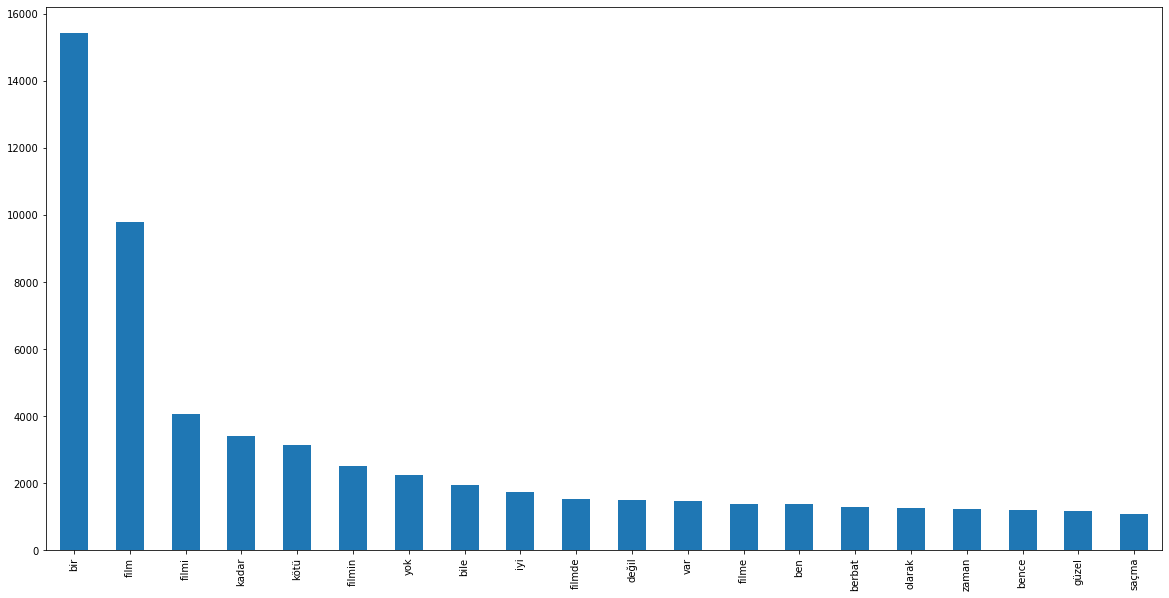

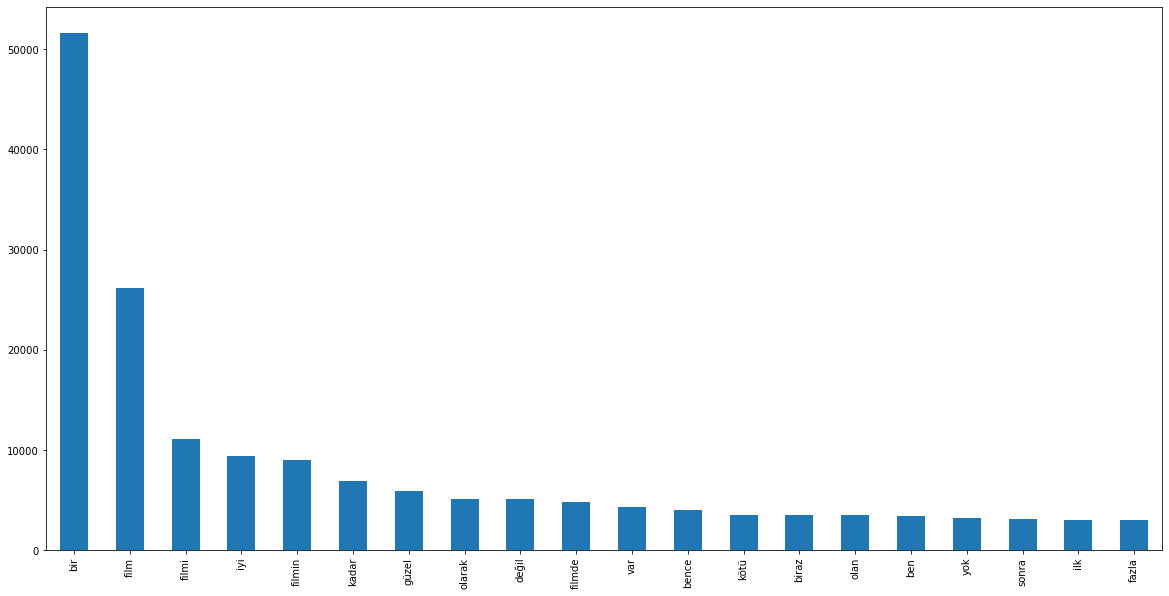

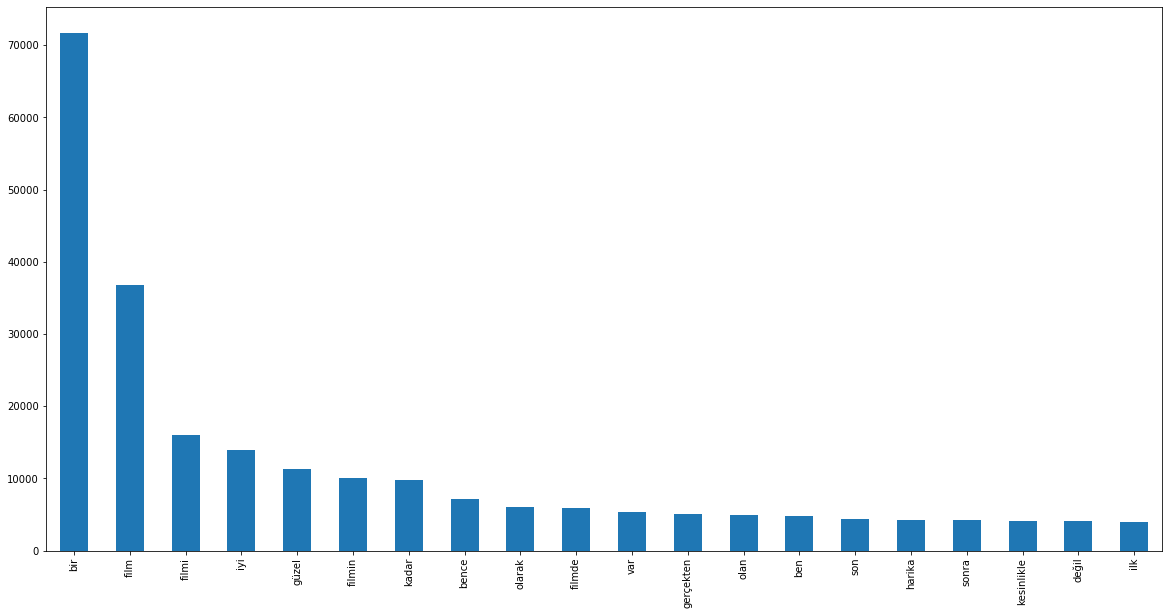

In [7]:
label_0 = df[df.point == 0]['comment']
label_1 = df[df.point == 1]['comment']
label_2 = df[df.point == 2]['comment']

splitted_data = [label_0, label_1, label_2]
for item in range(3):
    plt.figure(figsize=(20, 10))
    all_ = []
    for i in splitted_data[item]:
        all_ += i 
    pd.Series(all_).value_counts().head(20).plot(kind='bar')
    plt.show()

In [ ]:
from math import log

J = df['comment'].count()
J_i = {}

label_0 = df[df.point == 0]['comment']
label_1 = df[df.point == 1]['comment']
label_2 = df[df.point == 2]['comment']
splitted_data = [label_0, label_1, label_2]
for item in range(3):
    all_ = []
    for i in splitted_data[item]:
        all_ += i
        
    nc = pd.Series(all_).value_counts()
    log(nc_i + 1) * log() for nc_i in nc
    plt.show()

In [9]:
model = Word2Vec(df['comment'], size=300, min_count=5, window=3)
model.wv.save_word2vec_format('embedding_vectors.txt', binary=False)

In [10]:
df['comment'] = df['comment'].apply(' '.join)
df.to_csv('data/clean_dataset.csv', index=False)

from sklearn.utils import shuffle
import nlpaug.augmenter.word as naw

def augment_text(df, class_n, samples=300,pr=0.2):
    aug_w2v = naw.WordEmbsAug(model_type='word2vec', model_path='embedding_vectors.txt', action='substitute')
    aug_w2v.aug_p=pr
    new_text=[]
    
    # Selecting class
    df_n=df[df.point==class_n].reset_index(drop=True)

    ## data augmentation loop
    j=0
    for k in range(samples):    
        try:
            i = np.random.randint(0,len(df_n))
            text = df_n.iloc[i]['comment']
            augmented_text = aug_w2v.augment(text)
            new_text.append(augmented_text)
            j += 1
        except Exception:
            pass
    
    ## dataframe
    new = pd.DataFrame({'comment':new_text,'point':class_n})
    df = shuffle(df.append(new).reset_index(drop=True))
    return df

df = augment_text(df, 0, 2000)
df = augment_text(df, 1, 5000)
df.point.value_counts()